In [1]:
%cd ..

/home/dmarx/proj/stability-sdk


In [8]:
%%capture
!pip install -e .

In [4]:
import getpass
import os

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['API_KEY'] = getpass.getpass('Enter your API Key')

In [5]:
from stability_sdk import client


In [6]:
!python -m stability_sdk.client --help

usage: client.py [-h] [--height HEIGHT] [--width WIDTH]
                 [--cfg_scale CFG_SCALE] [--sampler SAMPLER] [--steps STEPS]
                 [--seed SEED] [--prefix PREFIX] [--no-store]
                 [--num_samples NUM_SAMPLES] [--show] [--engine ENGINE]
                 prompt [prompt ...]

positional arguments:
  prompt

optional arguments:
  -h, --help            show this help message and exit
  --height HEIGHT, -H HEIGHT
                        [512] height of image
  --width WIDTH, -W WIDTH
                        [512] width of image
  --cfg_scale CFG_SCALE, -C CFG_SCALE
                        [7.0] CFG scale factor
  --sampler SAMPLER, -A SAMPLER
                        [k_lms] (ddim, plms, k_euler, k_euler_ancestral,
                        k_heun, k_dpm_2, k_dpm_2_ancestral, k_lms)
  --steps STEPS, -s STEPS
                        [50] number of steps
  --seed SEED, -S SEED  random seed to use
  --prefix PREFIX, -p PREFIX
                        output prefixes f

In [8]:
!python -m stability_sdk.client --show 'foo bar baz'

2022-08-21 20:06:36,734 INFO client.py(364471) - Opening channel to grpc.stability.ai:443
2022-08-21 20:06:36,735 INFO client.py(364471) - Channel opened to grpc.stability.ai:443


In [10]:
stability_api = client.StabilityInference(
        key=os.environ['API_KEY'], 
        verbose=True
    )

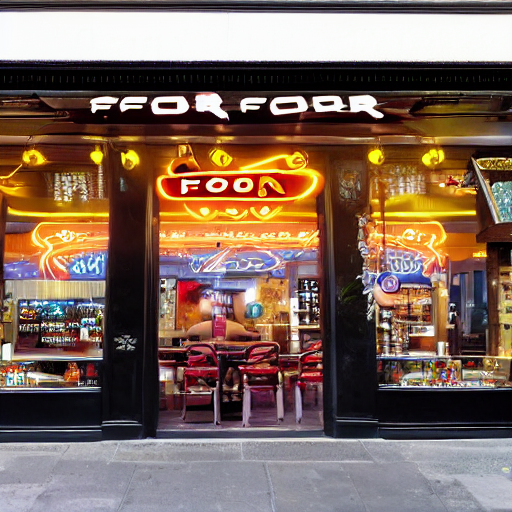

In [18]:
import io
from PIL import Image
from IPython.display import display

answers = stability_api.generate(
    prompt="foo bar baz"
)

for img_fname, artifact in client.process_artifacts_from_answers(
    prefix = "my_image_",
    answers=answers,
    write=False, # if set to True, image will be written to img_fname
):
    img = Image.open(io.BytesIO(artifact.binary))
    display(img)
